# Feature Extraction

In [134]:
import os 
import librosa
import math
import json


DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "new_features.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    # 1) Loop through all the genres
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment  # if s=0 -> num_segments_per_sample
                    chroma = librosa.feature.chroma_stft(y=signal[start_sample: finish_sample], sr=sr,n_chroma=12, n_fft=4096)
                    cq = librosa.feature.chroma_cqt(y=chroma[0], sr=sr)
                    gh = cq.reshape(cq.shape[0]* cq.shape[1])
                    print(gh.shape)
                    
                    mfcc = librosa.feature.mfcc(gh,
                                                sr =sr,
                                                n_fft = n_fft,
                                                n_mfcc = n_mfcc,
                                                hop_length = hop_length
                                                )
#                     mfcc = mfcc.T
                    
#                     if len(mfcc) == expected_no_of_mfcc_vectors_per_segment:
    #                     mfcc = mfcc.T   # making mfcc vector suitable to our DL model.
                    data["mfcc"].append(mfcc.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                


 Processing Negative-con
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 3
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 4
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 5
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 6
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 7
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 3
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 4
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 5
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 6
(12,)
c

 Processing Postive-con
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 0
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 1
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 2
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 3
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 4
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 5
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 6
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 7
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 0
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 1
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 2
(12,)


C:\Users\Furqan Ali\Anaconda3\envs\tensorflow_env\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 3
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 4
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 5
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 6
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 7
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 0
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 1
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 2
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 3
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 4
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 5
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 6
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 7
(12,)
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 0
(12,)
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 1
(12,)
cough_cleaned_touseef\Postive-con\pos-12

# Combining mfcc and zero-crossing rate

In [219]:
import os 
import librosa
import math
import json


DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "mfcc_zerocross.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    # 1) Loop through all the genres
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment  # if s=0 -> num_segments_per_sample
#                     chroma = librosa.feature.chroma_stft(y=signal[start_sample: finish_sample], sr=sr,n_chroma=12, n_fft=4096)
#                     cq = librosa.feature.chroma_cqt(y=chroma[0], sr=sr)
#                     gh = cq.reshape(cq.shape[0]* cq.shape[1])
#                     print(gh.shape)
                    
                    mfcc = librosa.feature.mfcc(signal[start_sample: finish_sample],
                                                sr =sr,
                                                n_fft = n_fft,
                                                n_mfcc = n_mfcc,
                                                hop_length = hop_length
                                                )
                    
                    hhh = mfcc.reshape(mfcc.shape[0]*mfcc.shape[1])

                    zcr = librosa.feature.zero_crossing_rate(hhh)
                    zcr = zcr.T
                    
#                     if len(mfcc) == expected_no_of_mfcc_vectors_per_segment:
    #                     mfcc = mfcc.T   # making mfcc vector suitable to our DL model.
                    data["mfcc"].append(zcr.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                


 Processing Negative-con
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg

cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-13.wav, segment : 0
cough_cleaned_

# USING Roll off Features

In [224]:
import os 
import librosa
import math
import json


DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "roll_off.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment 
                    
                    rolloff = librosa.feature.spectral_rolloff(y=signal[start_sample: finish_sample], sr=sr, roll_percent=0.1)
#                     chroma = librosa.feature.chroma_stft(y=signal[start_sample: finish_sample], sr=sr,n_chroma=12, n_fft=4096)
#                     cq = librosa.feature.chroma_cqt(y=chroma[0], sr=sr)
#                     gh = cq.reshape(cq.shape[0]* cq.shape[1])
#                     print(gh.shape)
                    
#                     mfcc = librosa.feature.mfcc(signal[start_sample: finish_sample],
#                                                 sr =sr,
#                                                 n_fft = n_fft,
#                                                 n_mfcc = n_mfcc,
#                                                 hop_length = hop_length
#                                                 )
                    
#                     hhh = mfcc.reshape(mfcc.shape[0]*mfcc.shape[1])

#                     zcr = librosa.feature.zero_crossing_rate(hhh)
                    rolloff = rolloff.T
                    
#                     if len(mfcc) == expected_no_of_mfcc_vectors_per_segment:
    #                     mfcc = mfcc.T   # making mfcc vector suitable to our DL model.
                    data["mfcc"].append(rolloff.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                


 Processing Negative-con
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg

cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-13.wav, segment : 0
cough_cleaned_

# Combining any three features:

In [311]:
import os 
import librosa
import math
import json


DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "rolloff_rms.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment 
                    
                    rms = librosa.feature.rms(y = signal[start_sample: finish_sample])
                    rms_sha = rms.reshape(rms.shape[0]*rms.shape[1])
                    rolloff = librosa.feature.spectral_rolloff(y=rms_sha, sr=sr, roll_percent=0.1)
                    rolloff_sha = rolloff.reshape(rolloff.shape[0]*rolloff.shape[1])
                    S = np.abs(librosa.stft(rolloff_sha))
                    p2 = librosa.feature.poly_features(S=S, order=2)
                    
                    
                    data["mfcc"].append(p2.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                


 Processing Negative-con
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg

cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-13.wav, segment : 0
cough_cleaned_

# Combining 3 imp features

In [319]:
import os 
import librosa
import math
import json


DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "rms_roll_mfcc.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment 
                    
                    rms = librosa.feature.rms(y = signal[start_sample: finish_sample])
                    rms_sha = rms.reshape(rms.shape[0]*rms.shape[1])
                    rolloff = librosa.feature.spectral_rolloff(y=rms_sha, sr=sr, roll_percent=0.1)
                    rolloff_sha = rolloff.reshape(rolloff.shape[0]*rolloff.shape[1])
                    
                    mfcc = librosa.feature.mfcc(rolloff_sha,
                                                sr =sr,
                                                n_fft = n_fft,
                                                n_mfcc = n_mfcc,
                                                hop_length = hop_length
                                                )
                    
#                     mfcc = mfcc.T
                    
#                      if len(mfcc) == expected_no_of_mfcc_vectors_per_segment:
    #                     mfcc = mfcc.T   # making mfcc vector suitable to our DL model.
                    data["mfcc"].append(mfcc.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                


 Processing Negative-con
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg

cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-13.wav, segment : 0
cough_cleaned_

# USING Roll oFf and MFCC

In [357]:
import os 
import librosa
import math
import json


DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "roll_mfcc.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment 
                    
                    rolloff = librosa.feature.spectral_rolloff(y=signal[start_sample: finish_sample], sr=sr, roll_percent=0.1)
                    rolloff_sha = rolloff.reshape(rolloff.shape[0]*rolloff.shape[1])
                    
                    mfcc = librosa.feature.mfcc(rolloff_sha,
                                                sr =sr,
                                                n_fft = n_fft,
                                                n_mfcc = n_mfcc,
                                                hop_length = hop_length
                                                )
                    
#                     mfcc = mfcc.T
                    
#                     if len(mfcc) == expected_no_of_mfcc_vectors_per_segment:
#                         mfcc = mfcc.T   # making mfcc vector suitable to our DL model.
                    data["mfcc"].append(mfcc.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                


 Processing Negative-con
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg

cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-13.wav, segment : 0
cough_cleaned_

In [485]:
# Random trial for testing stored data

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json

DATASET_PATH = "roll_mfcc.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)
print(X.shape)
print(X[0].shape)

(256, 13, 1)
(13, 1)


# SVM model 1

In [111]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "chroma.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=10)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=20, gamma=0.00001)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.495
The accuracy score on test set is : 0.49514563106796117


# Model 2

In [188]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "chroma_mfcc.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=51)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=20, gamma=0.00001)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.515
The accuracy score on test set is : 0.5145631067961165


In [220]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "mfcc_zerocross.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=31)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=20, gamma=0.00001)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.495
The accuracy score on test set is : 0.49514563106796117


# SVM with rolloff features

In [235]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "roll_off.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=30)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=20, gamma=0.00001)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.655
The accuracy score on test set is : 0.6551724137931034


# Roll off is performing better on SVM

# SVM with 3 features

In [309]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "3_combined_features.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=35)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=20, gamma=0.01)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.495
The accuracy score on test set is : 0.49514563106796117


# SVM 3 famous combined features

In [484]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "rms_roll_mfcc.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=17)

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=3, gamma=0.0001)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.476
The accuracy score on test set is : 0.47572815533980584


# SVM ROLL+MFCC

In [467]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "roll_mfcc.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=30)

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))

# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C = 3, gamma = 0.0001)      
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.660
The accuracy score on test set is : 0.6601941747572816


# Random_forest 

## Roll+mfcc

Model is running .....
Testing Accuracy: 0.6504854368932039

ROC curve value is:  0.6982237339380196
Confusion matrix, without normalization
[[33 16]
 [20 34]]


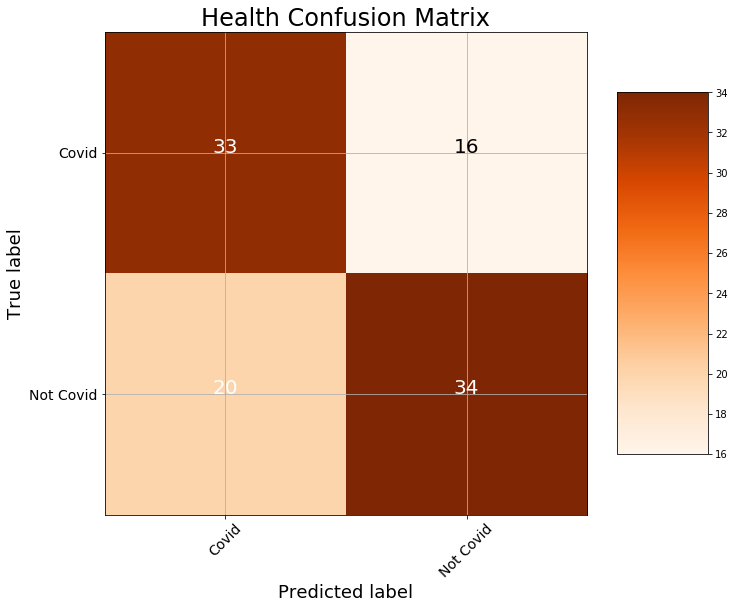

In [496]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools



DATASET_PATH = "roll_mfcc.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=45, shuffle=True)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth=50, random_state=48, n_estimators=97)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(training, y_train)

y_pred=clf.predict(test)

# Model Accuracy, how often is the classifier correct

print("Model is running .....")
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Probabilities for each class
rf_probs = clf.predict_proba(test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print()
print("ROC curve value is: ",roc_value)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

plt.savefig('cm78.png')